In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [11]:
model_name = "GEMM_STREAM_VMID=17926"

In [12]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [13]:
gpa_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,762652,0,8.122108,8.122108,0.000000,0.000000
1,1,160742,601910,38.535927,30.413819,0.097171,0.097171
2,2,91440,69302,67.742148,29.206221,0.119547,0.022376
3,3,63760,27680,97.150910,29.408762,0.132953,0.013406
4,4,48269,15491,128.329611,31.178701,0.142956,0.010003
5,5,38496,9773,160.908718,32.579107,0.150845,0.007889
6,6,31609,6887,195.967667,35.058950,0.157516,0.006671
7,7,26752,4857,231.546875,35.579208,0.163004,0.005489
8,8,23047,3705,268.769992,37.223117,0.167789,0.004785
9,9,20213,2834,306.453372,37.683380,0.171907,0.004118


In [14]:
rip_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,32600,0,190.010491,190.010491,0.000000,0.000000
1,1,9271,23329,668.141732,478.131241,0.003766,0.003766
2,2,5523,3748,1121.553866,453.412133,0.004976,0.001210
3,3,4095,1428,1512.659829,391.105963,0.005668,0.000692
4,4,3249,846,1906.538012,393.878183,0.006214,0.000546
5,5,2701,548,2293.351351,386.813340,0.006657,0.000442
6,6,2317,384,2673.432024,380.080673,0.007029,0.000372
7,7,2065,252,2999.681356,326.249332,0.007313,0.000285
8,8,1840,225,3366.490217,366.808861,0.007604,0.000291
9,9,1684,156,3678.350356,311.860139,0.007831,0.000227


In [15]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])

    # target_1 = "p"
    # target_1 = "p'"
    target_1 = "ratio'"
    target_2 = "upper limit for train/val accuracy"
    # target_2 = "accuracy'"
    
    color_1 = 'tab:red'
    ax_1.set_ylabel(target_1, color=color_1)
    ax_1.plot(df["threshold"], df[target_1], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel(target_2, color=color_2)
    ax_2.plot(df["threshold"], df[target_2], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    plt.show()

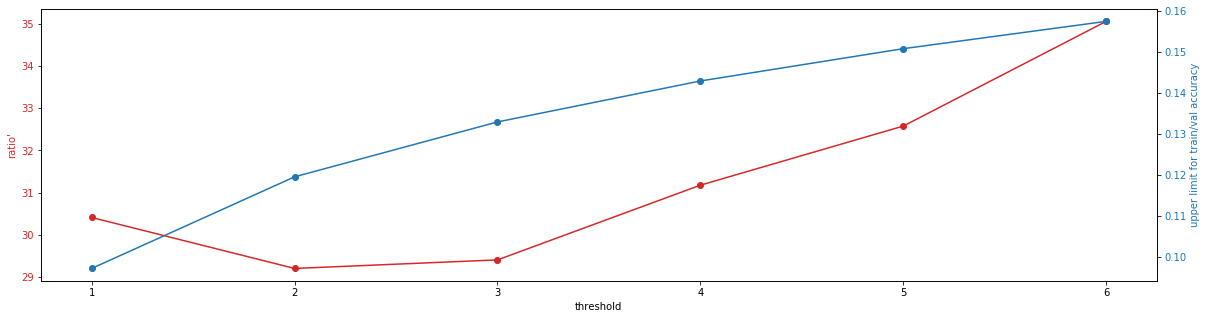

In [16]:
analysis_visualize(gpa_analysis[1:7])

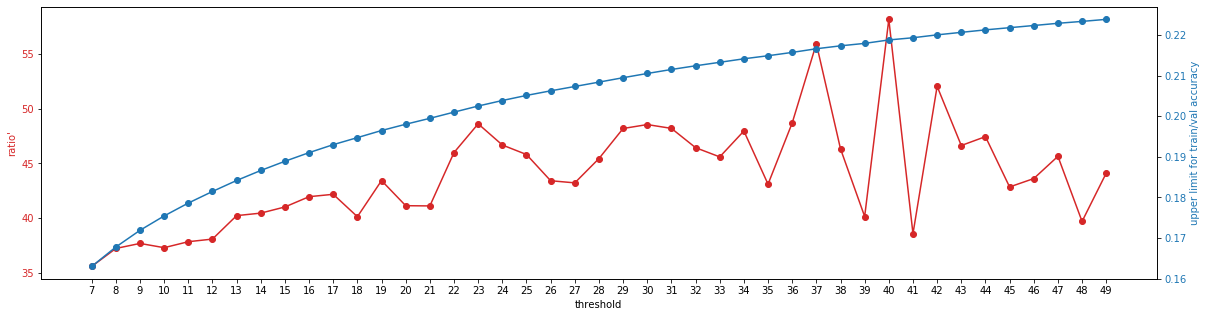

In [17]:
analysis_visualize(gpa_analysis[7:])

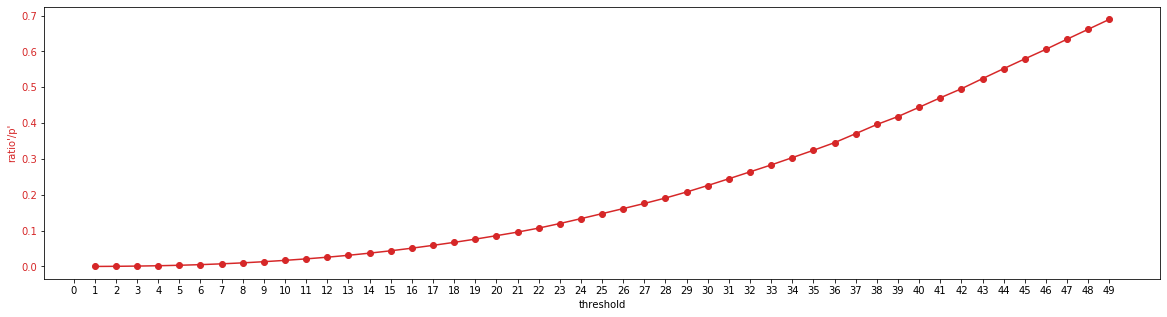

In [18]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio'/p'", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["ratio'"]/gpa_analysis["p'"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()